In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.gridspec import GridSpec

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np
import matplotlib
import matplotlib.ticker as tick

import pandas as pd
import seaborn as sns

from joblib import dump, load

In [2]:
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]

In [3]:
heating_classifiers = load('heating_classifiers.joblib')

C:\Users\wz0622\anaconda37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\wz0622\anaconda37\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator KMeans from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [4]:
temperature_axis_h = np.array([154. , 154.1, 154.2, 154.3, 154.4, 154.5, 154.6, 154.7, 154.8,
       154.9, 155. , 155.1, 155.2, 155.3, 155.4, 155.5, 155.6, 155.7,
       155.8, 155.9, 156. , 156.2, 156.4, 156.6, 156.8, 157. , 157.2,
       157.4, 157.6, 157.8, 158. , 158.2, 158.4, 158.6, 158.8, 159. ,
       159.2])
mapped_heating_data = np.random.randn(3, 37, 810000)

In [5]:
classifications_by_temperature = np.random.randint(0,3,size=(37,810000))

In [6]:
temp_sequence_h3=np.random.randint(0,3,size=(37,900,900))

In [7]:
heating_rnd_samples = np.random.randn(3, 5000)

In [8]:
h3_interp_rel_s_0 = np.random.randn(100)
h3_interp_rel_s_1 = np.random.randn(100)
h3_interp_rel_s_2 = np.random.randn(100)

total_h3 = h3_interp_rel_s_0+h3_interp_rel_s_1+h3_interp_rel_s_2

In [9]:
center_0_new_x = np.random.randn(100)
center_0_new_y = np.random.randn(100)

center_1_new_x = np.random.randn(100)
center_1_new_y = np.random.randn(100)

center_2_new_x = np.random.randn(100)
center_2_new_y = np.random.randn(100)

In [10]:
temp_h_x = np.linspace(154,159.2,100)

In [11]:
sos_h3 = np.random.randn(3, 37, 3)

C:\Users\wz0622\anaconda37\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\wz0622\anaconda37\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


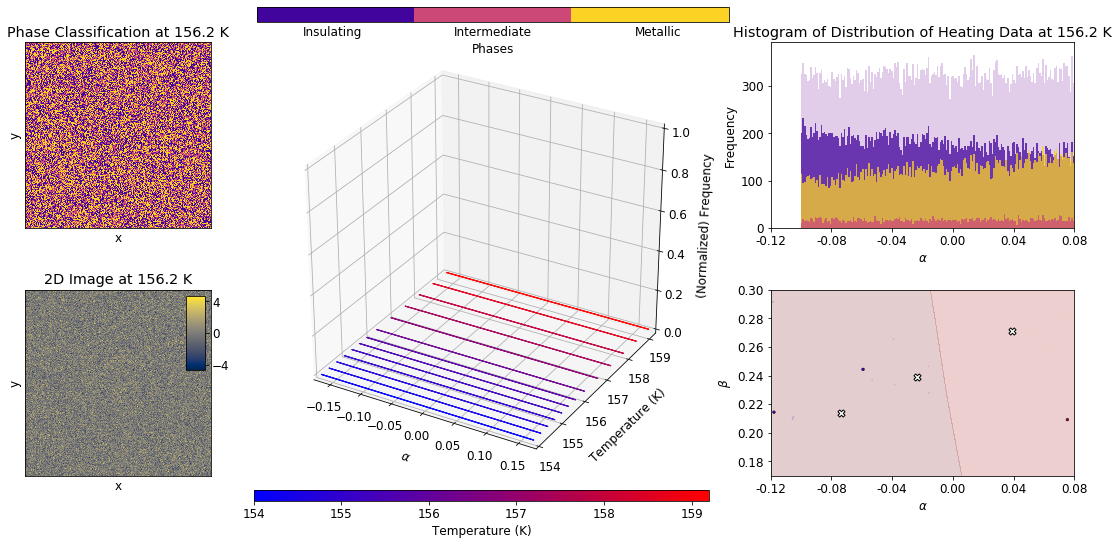

In [13]:
plt.rcParams.update({'font.family':'sans-serif','font.size': 12})

fig = plt.figure(constrained_layout=True, figsize=(15.6,7.2))

gs = GridSpec(6, 13, figure=fig,)
ax1 = fig.add_subplot(gs[:, 3:9],projection='3d')
ax2 = fig.add_subplot(gs[:3, -4:])
# ax3 = fig.add_subplot(gs[-3:, -4:])
ax4 = fig.add_subplot(gs[-3:, -4:],sharex=ax2)

ax5 = fig.add_subplot(gs[-3:, :3])
ax6 = fig.add_subplot(gs[:3, :3])

plasma = cm.get_cmap('plasma', 100)

p = plasma(10)
g = plasma(50)
y = plasma(90)

colors_fixed=[p,g,y]

cm_phases = matplotlib.colors.ListedColormap(colors_fixed)

##############################################################################################################################


cm1 = colors.LinearSegmentedColormap.from_list("r2b",["b","r"])
cNorm  = colors.Normalize(vmin=np.min(temperature_axis_h), vmax=np.max(temperature_axis_h))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm1)

# ax1.set_title("Phase Distribution as a Function of Temperature")

bins=np.linspace(-0.17,0.17,200)
xs = (bins[:-1]+bins[1:])/2
xs = np.append(xs,xs[0])
verts = []
zs = [temperature_axis_h[i] for i in range(0,len(temperature_axis_h),3)]

verts = []
for i in range(0,len(temperature_axis_h),3):
    phase_0 = mapped_heating_data[1,i,:][classifications_by_temperature[i]==0]
    phase_0, bins = np.histogram(phase_0,bins=bins)
    phase_0=phase_0/65000
    phase_0 = np.append(phase_0,phase_0[0])
    verts.append(list(zip(xs, phase_0)))

poly = PolyCollection(verts, facecolors=p, edgecolors=scalarMap.to_rgba(zs))
poly.set_alpha(0.6)
ax1.add_collection3d(poly, zs=zs, zdir='y')

verts = []
for i in range(0,len(temperature_axis_h),3):
    phase_1 = mapped_heating_data[1,i,:][classifications_by_temperature[i]==1]
    phase_1, bins = np.histogram(phase_1,bins=bins)
    phase_1=phase_1/65000
    phase_1 = np.append(phase_1,phase_1[0])
    verts.append(list(zip(xs, phase_1)))

poly = PolyCollection(verts, facecolors=y, edgecolors=scalarMap.to_rgba(zs))
poly.set_alpha(0.6)
ax1.add_collection3d(poly, zs=zs, zdir='y')

verts = []
for i in range(0,len(temperature_axis_h),3):
    phase_2 = mapped_heating_data[1,i,:][classifications_by_temperature[i]==2]
    phase_2, bins = np.histogram(phase_2,bins=bins)
    phase_2=phase_2/65000
    phase_2 = np.append(phase_2,phase_2[0])
    verts.append(list(zip(xs, phase_2)))

poly = PolyCollection(verts, facecolors=g, edgecolors=scalarMap.to_rgba(zs))
poly.set_alpha(0.6)
ax1.add_collection3d(poly, zs=zs, zdir='y')

ax1.set_xlabel(r'$\alpha$',fontsize=12,labelpad=10)
ax1.set_xlim3d(bins[0],bins[-1])
ax1.set_ylabel('Temperature (K)',fontsize=12,labelpad=10)
ax1.set_ylim3d(temperature_axis_h[0], temperature_axis_h[-1])
ax1.set_zlabel('(Normalized) Frequency',fontsize=12,labelpad=10)
ax1.set_zlim3d(0, 1)

# ##############################################################################################################################

ax5.set_title("2D Image at {} K".format(temperature_axis_h[21]))
im = ax5.imshow(np.reshape(mapped_heating_data[1,21,:],(900,900)),cmap="cividis")
# im = ax5.imshow(np.random.randn(900,900),cmap="plasma")
# im.set_clim(0.1, -0.1)
# cbar = fig.colorbar(im,ticks=[-.1, 0, .1],fraction=0.046, pad=0.04,ax=ax5,aspect=50)
# cbar.ax.set_yticklabels(['-.1', '0', '.1'])

cbaxes = inset_axes(ax5, width="10%", height="40%", loc=1)
cbar = fig.colorbar(im,fraction=0.046, pad=0.04,cax=cbaxes,orientation='vertical')
# cbar.ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))
cbar.ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax5.set_ylabel(r"y",fontsize=12)
ax5.set_xlabel(r"x",fontsize=12)

ax5.yaxis.set_major_locator(plt.NullLocator())
ax5.xaxis.set_major_locator(plt.NullLocator())

# ##############################################################################################################################

from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm

ax6.set_title("Phase Classification at {} K".format(temperature_axis_h[21]))

in_array = temp_sequence_h3[21]

process = np.zeros(in_array.shape)

process[in_array==0]=0

process[in_array==1]=2

process[in_array==2]=1

im = ax6.imshow(process,cmap=cm_phases)
cax = fig.add_axes([0.23, 1, 0.42, 0.03])
cbar = fig.colorbar(im,cax=cax,ticks=[.32,0,1.0,0,1.7],fraction=0.046, pad=0.04,aspect=60,orientation='horizontal')
cbar.ax.set_xticklabels(['Insulating','','Intermediate', '', 'Metallic'],fontsize=12)
cbar.ax.tick_params(size=0)
cbar.set_label("Phases",fontsize=12)
# cbar = fig.colorbar(im,ax=ax6,ticks=[.5,0,1.22,0,1.8],fraction=0.046, pad=0.04,aspect=50)
# cbar.ax.set_yticklabels(['Insulating','','Intermediate', '', 'Metallic'],rotation=-90,fontsize=10)
# cbar.ax.tick_params(size=0)
ax6.set_ylabel(r"y",fontsize=12)
ax6.set_xlabel(r"x",fontsize=12)

ax6.yaxis.set_major_locator(plt.NullLocator())
ax6.xaxis.set_major_locator(plt.NullLocator())

##############################################################################################################################

ax2.set_title("Histogram of Distribution of Heating Data at {} K".format(temperature_axis_h[21]))
bins=np.linspace(-0.1,0.1,200)

classifications_3 = heating_classifiers[2].predict(mapped_heating_data[:,21,:].T)

ax2.hist(mapped_heating_data[1,21,:],bins=bins,color=scalarMap.to_rgba(temperature_axis_h[21]),alpha=0.2)
ax2.hist(mapped_heating_data[1,21,:][classifications_3==0],label="Phase 0",bins=bins,alpha = 0.75,color=p)
ax2.hist(mapped_heating_data[1,21,:][classifications_3==1],label="Phase 1",bins=bins,alpha = 0.75,color=y)
ax2.hist(mapped_heating_data[1,21,:][classifications_3==2],label="Phase 2",bins=bins,alpha = 0.75,color=g)

ax2.xaxis.set_major_formatter(tick.FormatStrFormatter("%.2f"))
ax2.xaxis.set_major_locator(plt.MaxNLocator(5))

ax2.set_xlabel(r"$\alpha$",fontsize=12)
ax2.set_ylabel("Frequency",fontsize=12)

##############################################################################################################################

#Metallic Marker
m_marker_style = dict(marker='X',c='white',edgecolors='k',s=50,label="Center 0",zorder=3)

#Intermediate Marker
ii_marker_style = dict(marker='X',c='white',edgecolors='k',s=50,label="Center 1",zorder=3)

#Insulating Marker
i_marker_style = dict(marker='X',c='white',edgecolors='k',s=50,label="Center 2",zorder=3)

#RND
df_h = pd.DataFrame(heating_rnd_samples.T[:,:2],columns=["x", "y"])

#Path Parameters
path_parameters_0=dict(alpha=0.5,s=50*(h3_interp_rel_s_0/total_h3),zorder=2)
path_parameters_1=dict(alpha=0.5,s=50*(h3_interp_rel_s_1/total_h3),zorder=2)
path_parameters_2=dict(alpha=0.5,s=50*(h3_interp_rel_s_2/total_h3),zorder=2)

im_1=ax4.scatter(center_0_new_y,center_0_new_x,c=scalarMap.to_rgba(temp_h_x),**path_parameters_0)
im_2=ax4.scatter(heating_classifiers[2].cluster_centers_[0][1],heating_classifiers[2].cluster_centers_[0][0],**m_marker_style)

im_3=ax4.scatter(center_1_new_y,center_1_new_x,c=scalarMap.to_rgba(temp_h_x),**path_parameters_1)
im_4=ax4.scatter(heating_classifiers[2].cluster_centers_[1][1],heating_classifiers[2].cluster_centers_[1][0],**ii_marker_style)

im_3=ax4.scatter(center_2_new_y,center_2_new_x,c=scalarMap.to_rgba(temp_h_x),**path_parameters_2)
im_4=ax4.scatter(heating_classifiers[2].cluster_centers_[2][1],heating_classifiers[2].cluster_centers_[2][0],**i_marker_style)

scatter_style = dict(c=scalarMap.to_rgba(temperature_axis_h),s=7,zorder=2,edgecolors='black',linewidth=0.5)

im_5=ax4.scatter(sos_h3[0,:,1],sos_h3[0,:,0],**scatter_style)
im_6=ax4.scatter(sos_h3[1,:,1],sos_h3[1,:,0],**scatter_style)
im_7=ax4.scatter(sos_h3[2,:,1],sos_h3[2,:,0],**scatter_style)

sns.kdeplot(df_h.y,df_h.x, cmap="Reds", shade=True, shade_lowest=False,alpha=0.2,ax=ax4)

heating_classifications_rnd = heating_classifiers[2].predict(heating_rnd_samples.T)

process = np.zeros(heating_classifications_rnd.shape)

process[heating_classifications_rnd==0]=0
process[heating_classifications_rnd==1]=2
process[heating_classifications_rnd==2]=1

im = ax4.scatter(heating_rnd_samples.T[:,1],heating_rnd_samples.T[:,0],c=process,s=0.6,cmap=cm_phases,alpha=0.2)

ax4.set_xlabel(r"$\alpha$",fontsize=12)
ax4.set_ylabel(r"$\beta$",fontsize=12)
plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=6)
cbar = fig.colorbar(scalarMap,ax=ax1,aspect=20,orientation='horizontal')
cbar.set_label("Temperature (K)",fontsize=12)

ax4.set_ylim(0.17,0.3)
ax4.set_xlim(-0.12,0.08)

##############################################################################################################################

plt.show()